In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 60)
df = pd.DataFrame.from_csv('merged_nba_data.csv')
df.head()

,FG,FGA,3P,3PA,FT,FTA,OR,DR,TOT,A,PF,ST,TO TO,BL,PTS,POSS,PACE,OEFF,DEFF,win_or_loss,points_per_poss,true_shooting_%,Off_reb_minus_TO,opp_fgpct,TO_rate,off_reb_pct,free_throw_pct_of_FGA,free_throw_pct,rest_days_adj,made_FG_poss,attempted_FG_poss,total_rebounds_poss,3P_pct,close,long-range,mid-range,3_point_pct_of_fga,close_pct_of_fga,long_range_pct_of_fga,mid_range_pct_of_fga
0,32,87,9,27,15,20,13,29,42,17,22,6,18,6,88,100.4,100.4,87.7,116.6,0,0.876494,0.459290,-5,0.478723,0.179283,0.245283,0.229885,0.750000,3.0,0.318725,0.866534,0.418327,0.333333,19,1,34,0.310345,0.218391,0.011494,0.390805
1,45,94,13,35,14,19,11,40,51,31,22,12,15,5,117,100.4,100.4,116.6,87.7,1,1.165339,0.571512,-4,0.367816,0.149402,0.275000,0.202128,0.736842,3.0,0.448207,0.936255,0.507968,0.371429,30,0,21,0.372340,0.319149,0.000000,0.223404
2,40,82,8,24,16,16,6,25,31,19,19,9,14,5,104,92.5,92.5,112.4,122.1,0,1.124324,0.584007,-8,0.520000,0.151351,0.171429,0.195122,1.000000,3.0,0.432432,0.886486,0.335135,0.333333,23,0,30,0.292683,0.280488,0.000000,0.365854
3,39,75,13,19,22,22,5,29,34,22,18,5,13,3,113,92.5,92.5,122.1,112.4,1,1.221622,0.667218,-8,0.487805,0.140541,0.166667,0.293333,1.000000,3.0,0.421622,0.810811,0.367568,0.684211,17,0,29,0.253333,0.226667,0.000000,0.386667
4,47,98,12,24,23,26,21,34,55,25,19,13,14,3,129,98.8,98.8,130.6,101.2,1,1.305668,0.589364,7,0.470588,0.141700,0.437500,0.265306,0.884615,3.0,0.475709,0.991903,0.556680,0.500000,25,0,43,0.244898,0.255102,0.000000,0.438776


In [4]:
y = df['win_or_loss']
y.head()

0    0
1    1
2    0
3    1
4    1
Name: win_or_loss, dtype: int64

In [5]:
df.drop('win_or_loss', axis=1, inplace=True)
df.head()

,FG,FGA,3P,3PA,FT,FTA,OR,DR,TOT,A,PF,ST,TO TO,BL,PTS,POSS,PACE,OEFF,DEFF,points_per_poss,true_shooting_%,Off_reb_minus_TO,opp_fgpct,TO_rate,off_reb_pct,free_throw_pct_of_FGA,free_throw_pct,rest_days_adj,made_FG_poss,attempted_FG_poss,total_rebounds_poss,3P_pct,close,long-range,mid-range,3_point_pct_of_fga,close_pct_of_fga,long_range_pct_of_fga,mid_range_pct_of_fga
0,32,87,9,27,15,20,13,29,42,17,22,6,18,6,88,100.4,100.4,87.7,116.6,0.876494,0.459290,-5,0.478723,0.179283,0.245283,0.229885,0.750000,3.0,0.318725,0.866534,0.418327,0.333333,19,1,34,0.310345,0.218391,0.011494,0.390805
1,45,94,13,35,14,19,11,40,51,31,22,12,15,5,117,100.4,100.4,116.6,87.7,1.165339,0.571512,-4,0.367816,0.149402,0.275000,0.202128,0.736842,3.0,0.448207,0.936255,0.507968,0.371429,30,0,21,0.372340,0.319149,0.000000,0.223404
2,40,82,8,24,16,16,6,25,31,19,19,9,14,5,104,92.5,92.5,112.4,122.1,1.124324,0.584007,-8,0.520000,0.151351,0.171429,0.195122,1.000000,3.0,0.432432,0.886486,0.335135,0.333333,23,0,30,0.292683,0.280488,0.000000,0.365854
3,39,75,13,19,22,22,5,29,34,22,18,5,13,3,113,92.5,92.5,122.1,112.4,1.221622,0.667218,-8,0.487805,0.140541,0.166667,0.293333,1.000000,3.0,0.421622,0.810811,0.367568,0.684211,17,0,29,0.253333,0.226667,0.000000,0.386667
4,47,98,12,24,23,26,21,34,55,25,19,13,14,3,129,98.8,98.8,130.6,101.2,1.305668,0.589364,7,0.470588,0.141700,0.437500,0.265306,0.884615,3.0,0.475709,0.991903,0.556680,0.500000,25,0,43,0.244898,0.255102,0.000000,0.438776


In [15]:
X = df.values


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [16]:
sss = StratifiedShuffleSplit(test_size=0.25)
sss.get_n_splits(X, y)

10

In [29]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [20]:
clf = RandomForestClassifier(n_jobs=-1,random_state=20)

parameters = {'n_estimators':[3,5,10,15,20,30,40],
              'max_features':['auto', 'sqrt', 'log2'],
              'min_samples_split':[5,10,20,30,40]}


In [31]:
from sklearn.model_selection import GridSearchCV

CV_rfc = GridSearchCV(estimator=clf, param_grid=parameters, cv=sss)
CV_rfc.fit(X_train,y_train)
print(CV_rfc.best_params_)

{'n_estimators': 40, 'max_features': 'auto', 'min_samples_split': 5}


In [32]:
rfc = CV_rfc.best_estimator_

In [33]:
pred = rfc.predict(X_test)

In [34]:
accuracy_score(y_test, pred)

0.96422764227642277

In [44]:
fi = rfc.feature_importances_
fi_df = pd.DataFrame({'fi':fi})

In [45]:
fi_names = list(df.columns.values)
fi_names_df = pd.DataFrame({'fi_names':fi_names})

In [47]:
fi_names_df.head()

,fi_names
0,FG
1,FGA
2,3P
3,3PA
4,FT


In [48]:
fi_df.head()

,fi
0,0.021509
1,0.007266
2,0.011907
3,0.004663
4,0.007290


In [50]:
fi_imp = fi_names_df.join(fi_df)
fi_imp.head()

,fi_names,fi
0,FG,0.021509
1,FGA,0.007266
2,3P,0.011907
3,3PA,0.004663
4,FT,0.007290


In [54]:
fi_imp = fi_imp.sort_values(by='fi',ascending=False)

In [57]:
fi_imp.reset_index(drop=True,inplace=True)
fi_imp

,fi_names,fi
0,DEFF,0.272361
1,OEFF,0.121906
2,opp_fgpct,0.094486
3,points_per_poss,0.086967
4,true_shooting_%,0.057889
5,PTS,0.049849
6,made_FG_poss,0.038336
7,DR,0.035404
8,FG,0.021509
9,total_rebounds_poss,0.018660


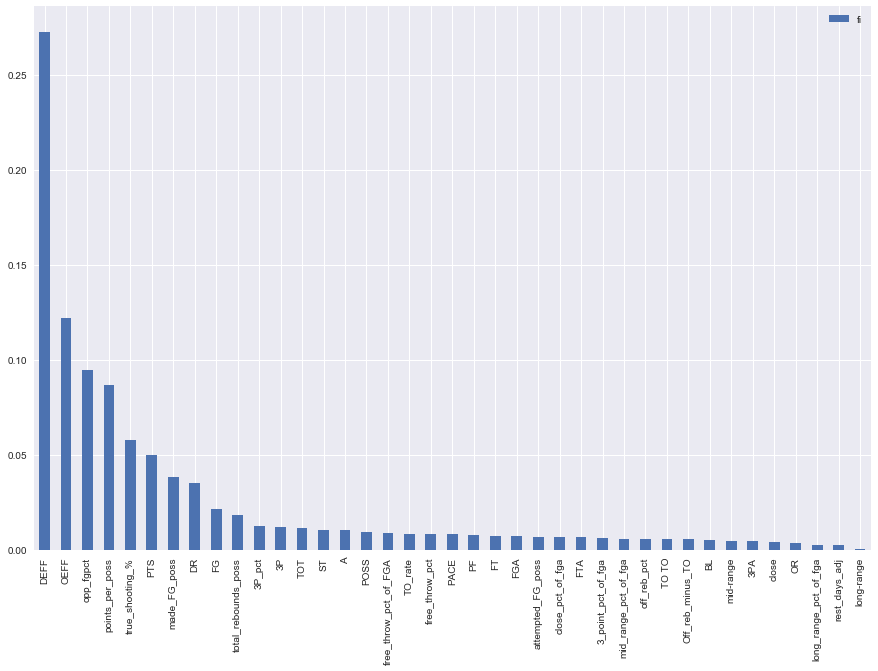

In [76]:
ax = fi_imp.plot(kind='bar',figsize=(15,10))
ax.set_xticklabels(fi_imp.fi_names)
